# IIT2019173

In [11]:
import os
import cv2
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib
from scipy import misc
import math
from numpy import r_
from skimage import io
from math import cos

## Q1- Run length encoding

In [12]:
def encode(message):
    encoded=[]
    i = 0
    while (i <= len(message)-1):
        count = 1
        ch = message[i]
        j = i
        while (j < len(message)-1): 
            if (message[j] == message[j + 1]): 
                count = count + 1
                j = j + 1
            else: 
                break
        encoded.append([ch,count])
        i = j + 1
    return encoded
A = [10 ,10 ,10 ,10 ,9 ,9 ,4 ,4 ,4 ,4 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1]
encode(A)

[[10, 4], [9, 2], [4, 4], [0, 5], [1, 5]]

## Q2- Compression using DCT coding

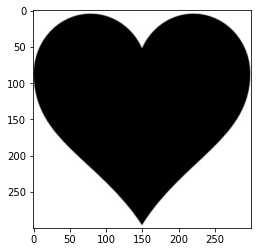

In [54]:
imgGray = Image.open("heart.jpg")
plt.imshow(imgGray,cmap=plt.cm.gray)

In [55]:
windowSize = int(input("Window-Size for DCT: "))
sumd = 0 
dctmatrix = np.zeros(np.shape(imgGray)) 
imgGray = np.asanyarray(imgGray) 
imgGray = imgGray.astype(np.int16) 
imgGray = imgGray-128 
imgGray2 = np.zeros(np.shape(imgGray)) 

imgGray

Window-Size for DCT:  5


array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=int16)

In [56]:
def cosp(i,j,n): 
  op = 0
  op = cos(((2*i)+1)*j*math.pi/(2*n))
  return op

In [57]:
def convolveDCT(img,n,u,v,a,b):
  sumd = 0
  for x in r_[0:n]:
    for y in r_[0:n]:
      if x < imgGray.shape[0] - a and y < imgGray.shape[1] - b:
        u = u%n
        v = v%n
        sumd += img[x+a,y+b]*cosp(x,u,n)*cosp(y,v,n)
 
  if(u == 0):
    sumd *= 1/math.sqrt(2) 
  else: 
    sumd *= 1
  if(v == 0):
    sumd *= 1/math.sqrt(2)
  else:
    sumd *= 1
  sumd *= 1/math.sqrt(2*n)

  return sumd

In [58]:
from pylab import *
for a in r_[0:np.shape(imgGray)[0]:windowSize]:
  for b in r_[0:np.shape(imgGray)[1]:windowSize]:
    for u in r_[a:a+windowSize]:
      for v in r_[b:b+windowSize]:
        if u < imgGray.shape[0] and v < imgGray.shape[1]:
          dctmatrix[u,v] = convolveDCT(imgGray,windowSize,u,v,a,b)
# DCT 
np.around(dctmatrix)

array([[502.,   0.,   0., ...,   0.,   0.,  -0.],
       [  0.,  -0.,  -0., ...,  -0.,   0.,   0.],
       [  0.,   0.,  -0., ...,  -0.,  -0.,   0.],
       ...,
       [  0.,   0.,  -0., ...,  -0.,  -0.,   0.],
       [  0.,   0.,  -0., ...,  -0.,   0.,   0.],
       [ -0.,  -0.,   0., ...,   0.,   0.,  -0.]])

Text(0.5, 1.0, 'DCTs of the image')

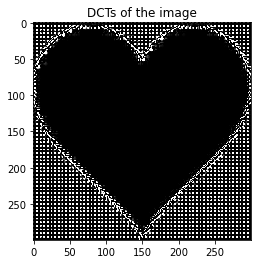

In [59]:
plt.figure()
plt.imshow(dctmatrix,cmap='gray',vmax = np.max(dctmatrix)*0.01,vmin = 0)
plt.title("DCTs of the image")

In [60]:
def convolveIDCT(dctmatrix,n,x,y,a,b): 
    sumd = 0
    for u in r_[0:n]:
    for v in r_[0:n]:
      if x < imgGray.shape[0] - a and y < imgGray.shape[1] - b:
        val1 = 1
        val2 = 1
        x = x%n
        y = y%n
        if(u == 0): 
          val1 = 1/math.sqrt(2)
        if(v == 0):
          val2 = 1/math.sqrt(2)
        sumd += dctmatrix[u+a,v+b]*val1*val2*cosp(x,u,n)*cosp(y,v,n)
   
    sumd *= 2/n
    return sumd

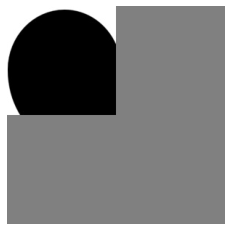

In [67]:
for a in r_[0:np.shape(dctmatrix)[0]:windowSize]:
    for b in r_[0:np.shape(dctmatrix)[1]:windowSize]:
        for x in r_[a:a+windowSize]:
            for y in r_[b:b+windowSize]:
                if x < imgGray.shape[0] and y < imgGray.shape[1]:
                    imgGray2[x,y] = convolveIDCT(dctmatrix,windowSize,x,y,a,b)

imgGray2 = imgGray2 + 128

plt.imshow(imgGray2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()